# Introdução à Data Science e Machine Learning - Data ICMC-USP

Esse material foi desenvolvido pelo **Data**, grupo de extensão de aprendizado e ciência de dados compostos por alunos do Instituto de Ciências Matemáticas e de Computação da USP, e editador por [Idalen](https://www.linkedin.com/), para fins de aprendizado. 

Para saber mais sobre as atividades do Data entre no site do grupo e os siga nas redes sociais:
- [Site](http://data.icmc.usp.br/)
- [Twitter](https://twitter.com/data_icmc)
- [LinkedIn](https://www.linkedin.com/school/data-icmc/)
- [Facebook](https://www.facebook.com/dataICMC/)

Este material trata sobre o algoritmo de classificação KNearestNeighbors e como implementá-lo em python para classificação de vinhos.

In [6]:
import numpy as np
import pandas as pd

Vamos começar carregando os dados que iremos usar no nossa tarefa. Esses dados fornecem várias informações a respeito de diferentes vinhos e o objetivo é classificar se o vinho é bom (target é a coluna *is_good*).

Esse conjunto de dados é uma modificação do conjunto 

In [7]:
df = pd.read_csv("data.csv")

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,is good
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0.0


In [8]:
# O atributo shape carrega o formato do nosso dataset, em (linhas, colunas).
shape = df.shape

print(shape)

(1599, 12)


In [9]:
#Iterando pelas colunas do dataset, podemos ver todas as suas features. 
for col in df.columns:
    print(col)

fixed acidity
volatile acidity
citric acid
residual sugar
chlorides
free sulfur dioxide
total sulfur dioxide
density
pH
sulphates
alcohol
is good


### Deixando os dados na mesma escala
Para vários algoritmos é importante deixarmos os dados em uma mesma escala, e o kNN um desses casos. Para entender melhor vamos olhar o exemplo a seguir:

<img src="imgs/grafico_escala.png" style="width: 400px"/>

Nesse caso a distância entre os dois pontos é dada por

$$
\begin{align*}
\text{dist}(x^{(1)}, x^{(2)}) &= \sqrt{(x^{(1)}_1 - x^{(2)}_1)^2 + (x^{(1)}_2 - x^{(2)}_2)^2} \\
  &= \sqrt{(3 - 2)^2 + (10000 - 9000)^2} \\
  &= \sqrt{1 + 1000000} \\
  &= \sqrt{1000001} \\
  &= 1000.0005
\end{align*}$$


Como as escalas são muito diferentes o primeiro atributo acaba não interferindo em praticamente nada no resultado da distância. E é importante perceber que esse tipo de situação ocorre com frequência em conjuntos de dados reais.

Existem diversas formas de tratar essa situação, aqui usaremos uma técnica chamada **Min-Max Scaling**, que transforma os dados deixando-os no intervalo $[0, 1]$. A formula é da transformação é a seguinte:

$$x^{(i)}_j \leftarrow \frac{x^{(i)}_j - min(x_j)}{max(x_j) - min(x_j)}$$

Em palavras significa que vamos subtrair o menor valor da atributo e dividir pela amplitude (diferença entre o máximo e o mínimo).


Pronto, agora que entendemos podemos fazer fazer isso para todas as nossas colunas utilizando a função interna do scikit-learn

In [19]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

scaler = MinMaxScaler()
scaler.fit(df)
df = pd.DataFrame(scaler.transform(df), columns=df.columns)

### Divisão dos dados em treino e validação

In [15]:
target = 'is good'
features = df.columns.to_list()
features.remove(target)

X_train, X_val, y_train, y_val = train_test_split(df[features], df[target], test_size=0.2, random_state=0)

print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(1279, 11)
(1279,)
(320, 11)
(320,)


### Treinando um modelo

In [18]:

#Instanciamos um KNeighborsClassifier na variável clf
clf = KNeighborsClassifier() 

#Treinamos o classificador com X_train e y_train 
clf.fit(X_train, y_train)

#Prevemos os resultados para os dados de validação
y_pred = clf.predict(X_val)


### Avaliando o modelo treinado

In [20]:
#Agora calculamos a acurácia do nosso modelo para avaliarmos sua qualidade.
acc = accuracy_score(y_val, y_pred)

print(f'A acurácia foi de {acc * 100:.2f}%')

A acurácia foi de 71.56%


### Explorando variações no modelo

#### Número de vizinhos

O principal hiperparâmetro do kNN é justamente o número de vizinhos, representado pelo k. Por padrão o `KNeighborsClassifier()` usa cinco vizinhos, através de seu parâmetro `n_neighbors` é possível alterar este valor.

#### Métrica de distância

Como vimos na aula, é possível utilizar diferentes metricas de distancia entre pontos, e vimos as duas seguintes:

- Distância Euclidiana => $dist(a, b) = \sqrt{\sum_i (a_i - b_i)^2}$
- Distância Manhattan => $dist(a, b) = \sum_i |a_i - b_i|$

O sklearn, por outro lado, faz uso de uma generalização destas duas distâncias, chamada distância **Minkowski** =>
$dist(a, b) = (\sum_i |a_i - b_i|^p)^\frac{1}{p}$. Perceba que com $p=2$ temos a distância Euclidiano e com $p=1$ temos a distância Manhattan. 

Por padrão a classe `KNeighborsClassifier()` usa `p=2`.

In [21]:
n_vizinhos = [n for n in range(3,15,2)]
resultados = []

for k in n_vizinhos:
    ##############################################################
    clf = KNeighborsClassifier(n_neighbors = k, p=1)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_val)
    
    acc = accuracy_score(y_val, y_pred)
    resultados.append(acc)

    ##############################################################

for k, acc in zip(n_vizinhos, resultados):
    print(f'{k:02d} vizinhos => Acurácia {acc * 100:.2f}%')

03 vizinhos => Acurácia 71.56%
05 vizinhos => Acurácia 66.56%
07 vizinhos => Acurácia 71.56%
09 vizinhos => Acurácia 74.06%
11 vizinhos => Acurácia 71.88%
13 vizinhos => Acurácia 73.12%


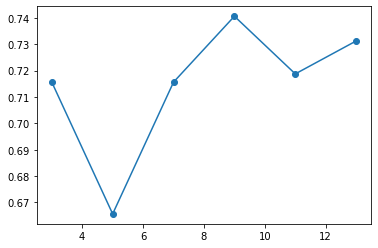

In [43]:
plt.plot(n_vizinhos, resultados, '-o')

Como podemos ver, o valor de K onde o algoritmo tem melhor desempenho nesse intervalo é o valor 9.